# Q2 Hopfield networks (35 marks)

<b>In this question, we train a Hopfield network and use it to reconstruct noisy
patterns.</b>

<b>
(a) (5 marks) The supplments folder contain three animal image files image1.png, image2.png, and image3.png.
Load the images in Python. What are the sizes of the images and their average pixel
values?</b>

<b>You may find the skimage.io.imread function from the scikit-image library useful.</b>

**Answer**. [Write your solution here. Add cells as needed.]

In [1]:
from skimage.io import imread

x1 = imread('supplements/image1.png')
x2 = imread('supplements/image2.png')
x3 = imread('supplements/image3.png')

In [2]:
x1.size, x2.size, x3.size

(4556, 4556, 4556)

In [3]:
x1.mean(), x2.mean(), x3.mean()

(197.3507462686567, 198.2462686567164, 204.73880597014926)

<b>(b) (5 marks) For each of the 3 images, convert it into a binary pattern by setting each
pixel value to -1 if it is smaller than the average pixel value, and +1 otherwise.</b>

**Answer**. [Write your solution here. Add cells as needed.]

In [4]:
def binary_image(x):
    neg = x < x.mean()
    neg = - neg.astype('int')
    pos = x >= x.mean()
    pos = pos.astype('int')
    return neg + pos

In [5]:
x1_binary, x2_binary, x3_binary = [binary_image(x) for x in [x1, x2, x3]]

<b>(c) (5 marks) If we want to use a Hopfield network to store the above 3 binary patterns,
how many neurons do we need?</b>

**Answer**. [Write your solution here. Add cells as needed.]

In [6]:
y1 = x1_binary.reshape(-1, 1)
y2 = x2_binary.reshape(-1, 1)
y3 = x3_binary.reshape(-1, 1)

In [7]:
import numpy as np

In [8]:
def w(y):
    z = y @ y.T 
    z -= np.diag(np.diag(z))
    return z

In [9]:
W = sum(w(y) for y in [y1, y2, y3])

In [10]:
W.size # 存储 neurons 个数

20757136

<b>(d) (5 marks) Train a Hopfield network to store the 3 binary patterns. How many weights
are positive and how many are negative?</b>

**Answer**. [Write your solution here. Add cells as needed.]

In [11]:
def weight_binary(x):
    neg = (x < 0).astype('int')
    pos = (x > 0).astype('int')
    return sum(neg) + sum(pos)

In [12]:
neg = sum(sum(W < 0)) # 负值个数
neg

6339068

In [13]:
pos = sum(sum(W > 0)) # 正值个数
pos

14413512

In [14]:
0 in W

True

In [15]:
W.size - (neg + pos)

4556

<b>(e) (5 marks) Write a function that accepts an input pattern, and synchronously updates
the activation states of the neurons at each iteration until convergence, or up to 100
iterations.</b>

<b>The supplements folder also contain three images, noisy1.png, noisy2.png, and noisy3.png, obtained by adding noise
to one of the 3 animal images. Use the trained Hopfield network and the above
synchronous update to reconstruct the original images. Display the reconstructed
images.</b>

<b>Note that you need to perform conversion between images and binary patterns.</b>

**Answer**. [Write your solution here. Add cells as needed.]

In [16]:
def update(W, c):
    c = W @ c
    c = -(c < 0).astype('int') + (c >= 0).astype('int')
    return c

In [17]:
n1 = imread('supplements/noisy1.png')
n2 = imread('supplements/noisy2.png')
n3 = imread('supplements/noisy3.png')

In [18]:
sum(np.array([2, 3, 4]) != np.array([2, 3, 4]))

0

In [19]:
c = np.ones((len(W), 1))
for k in range(100):
    change_c = c
    print(k, c.flatten())
    c = update(W, c)
    if sum(change_c != c) == 0:
        break

0 [1. 1. 1. ... 1. 1. 1.]
1 [1 1 1 ... 1 1 1]


In [20]:
-1 in c

True

In [21]:
from PIL import Image

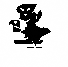

In [22]:
im = c.reshape(n1.shape)
Image.fromarray(n1-(im).astype('uint8')) 

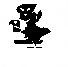

In [23]:
im = c.reshape(n2.shape)
Image.fromarray(n2-(im).astype('uint8')) 

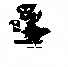

In [24]:
im = c.reshape(n3.shape)
Image.fromarray(n3-(im).astype('uint8')) 

<b>(f) (5 marks) Write a function that accepts an input pattern, and updates all the acti-
vation states of the neurons in a random order at each iteration until convergence,
or up to 100 iterations.</b>

<b>Use the trained Hopfield network and the above semi-random update to reconstruct
the original images. Display the reconstructed images.</b>

<b>To make your results reproducible, set the seed for the random number generator
to 1 before using it. For example, if you are using numpy to generate the random
ordering, you can then set the random seed using the function numpy.random.seed.</b>

**Answer**. [Write your solution here. Add cells as needed.]

In [25]:
np.random.seed(7)
index = np.arange(y1.size)
np.random.shuffle(index)
W = sum(w(y) for y in [y1, y2, y3])
n = len(W)
c = np.ones((n, 1))

change_c = 0
for k in range(100):
    change_c = c
    print(sum(change_c != c))
    for k in index:
        c[k] = update(W[k], c)
        print(f"a{k+1}", c.flatten())
    print(sum(change_c != c))
    if sum(change_c != c) == 0:
        break

[0]
a2448 [1. 1. 1. ... 1. 1. 1.]
a1189 [1. 1. 1. ... 1. 1. 1.]
a4145 [1. 1. 1. ... 1. 1. 1.]
a3795 [1. 1. 1. ... 1. 1. 1.]
a733 [1. 1. 1. ... 1. 1. 1.]
a1219 [1. 1. 1. ... 1. 1. 1.]
a3883 [1. 1. 1. ... 1. 1. 1.]
a3995 [1. 1. 1. ... 1. 1. 1.]
a1335 [1. 1. 1. ... 1. 1. 1.]
a3659 [1. 1. 1. ... 1. 1. 1.]
a3385 [1. 1. 1. ... 1. 1. 1.]
a1145 [1. 1. 1. ... 1. 1. 1.]
a787 [1. 1. 1. ... 1. 1. 1.]
a532 [1. 1. 1. ... 1. 1. 1.]
a1697 [1. 1. 1. ... 1. 1. 1.]
a2787 [1. 1. 1. ... 1. 1. 1.]
a501 [1. 1. 1. ... 1. 1. 1.]
a1086 [1. 1. 1. ... 1. 1. 1.]
a1749 [1. 1. 1. ... 1. 1. 1.]
a724 [1. 1. 1. ... 1. 1. 1.]
a2964 [1. 1. 1. ... 1. 1. 1.]
a1544 [1. 1. 1. ... 1. 1. 1.]
a3109 [1. 1. 1. ... 1. 1. 1.]
a3021 [1. 1. 1. ... 1. 1. 1.]
a3708 [1. 1. 1. ... 1. 1. 1.]
a4203 [1. 1. 1. ... 1. 1. 1.]
a1672 [1. 1. 1. ... 1. 1. 1.]
a2531 [1. 1. 1. ... 1. 1. 1.]
a3202 [1. 1. 1. ... 1. 1. 1.]
a3396 [1. 1. 1. ... 1. 1. 1.]
a2191 [1. 1. 1. ... 1. 1. 1.]
a196 [1. 1. 1. ... 1. 1. 1.]
a3535 [1. 1. 1. ... 1. 1. 1.]
a1948 [1. 1.

a4375 [1. 1. 1. ... 1. 1. 1.]
a421 [1. 1. 1. ... 1. 1. 1.]
a3313 [1. 1. 1. ... 1. 1. 1.]
a3025 [1. 1. 1. ... 1. 1. 1.]
a3364 [1. 1. 1. ... 1. 1. 1.]
a3846 [1. 1. 1. ... 1. 1. 1.]
a1210 [1. 1. 1. ... 1. 1. 1.]
a3687 [1. 1. 1. ... 1. 1. 1.]
a3127 [1. 1. 1. ... 1. 1. 1.]
a3556 [1. 1. 1. ... 1. 1. 1.]
a2426 [1. 1. 1. ... 1. 1. 1.]
a2858 [1. 1. 1. ... 1. 1. 1.]
a2960 [1. 1. 1. ... 1. 1. 1.]
a493 [1. 1. 1. ... 1. 1. 1.]
a373 [1. 1. 1. ... 1. 1. 1.]
a1217 [1. 1. 1. ... 1. 1. 1.]
a2430 [1. 1. 1. ... 1. 1. 1.]
a2741 [1. 1. 1. ... 1. 1. 1.]
a1741 [1. 1. 1. ... 1. 1. 1.]
a393 [1. 1. 1. ... 1. 1. 1.]
a4467 [1. 1. 1. ... 1. 1. 1.]
a4464 [1. 1. 1. ... 1. 1. 1.]
a1126 [1. 1. 1. ... 1. 1. 1.]
a841 [1. 1. 1. ... 1. 1. 1.]
a3744 [1. 1. 1. ... 1. 1. 1.]
a10 [1. 1. 1. ... 1. 1. 1.]
a905 [1. 1. 1. ... 1. 1. 1.]
a3757 [1. 1. 1. ... 1. 1. 1.]
a4165 [1. 1. 1. ... 1. 1. 1.]
a99 [1. 1. 1. ... 1. 1. 1.]
a1684 [1. 1. 1. ... 1. 1. 1.]
a379 [1. 1. 1. ... 1. 1. 1.]
a1307 [1. 1. 1. ... 1. 1. 1.]
a1671 [1. 1. 1. ... 1

a3087 [1. 1. 1. ... 1. 1. 1.]
a3205 [1. 1. 1. ... 1. 1. 1.]
a3357 [1. 1. 1. ... 1. 1. 1.]
a3801 [1. 1. 1. ... 1. 1. 1.]
a801 [1. 1. 1. ... 1. 1. 1.]
a3086 [1. 1. 1. ... 1. 1. 1.]
a1078 [1. 1. 1. ... 1. 1. 1.]
a597 [1. 1. 1. ... 1. 1. 1.]
a671 [1. 1. 1. ... 1. 1. 1.]
a1398 [1. 1. 1. ... 1. 1. 1.]
a548 [1. 1. 1. ... 1. 1. 1.]
a102 [1. 1. 1. ... 1. 1. 1.]
a427 [1. 1. 1. ... 1. 1. 1.]
a3932 [1. 1. 1. ... 1. 1. 1.]
a2062 [1. 1. 1. ... 1. 1. 1.]
a133 [1. 1. 1. ... 1. 1. 1.]
a565 [1. 1. 1. ... 1. 1. 1.]
a406 [1. 1. 1. ... 1. 1. 1.]
a1169 [1. 1. 1. ... 1. 1. 1.]
a695 [1. 1. 1. ... 1. 1. 1.]
a1342 [1. 1. 1. ... 1. 1. 1.]
a2797 [1. 1. 1. ... 1. 1. 1.]
a1122 [1. 1. 1. ... 1. 1. 1.]
a2788 [1. 1. 1. ... 1. 1. 1.]
a1282 [1. 1. 1. ... 1. 1. 1.]
a1852 [1. 1. 1. ... 1. 1. 1.]
a749 [1. 1. 1. ... 1. 1. 1.]
a4417 [1. 1. 1. ... 1. 1. 1.]
a2558 [1. 1. 1. ... 1. 1. 1.]
a3297 [1. 1. 1. ... 1. 1. 1.]
a1730 [1. 1. 1. ... 1. 1. 1.]
a3201 [1. 1. 1. ... 1. 1. 1.]
a4534 [1. 1. 1. ... 1. 1. 1.]
a4279 [1. 1. 1. ... 1

a347 [1. 1. 1. ... 1. 1. 1.]
a503 [1. 1. 1. ... 1. 1. 1.]
a1233 [1. 1. 1. ... 1. 1. 1.]
a4352 [1. 1. 1. ... 1. 1. 1.]
a834 [1. 1. 1. ... 1. 1. 1.]
a2513 [1. 1. 1. ... 1. 1. 1.]
a2938 [1. 1. 1. ... 1. 1. 1.]
a2297 [1. 1. 1. ... 1. 1. 1.]
a2044 [1. 1. 1. ... 1. 1. 1.]
a1430 [1. 1. 1. ... 1. 1. 1.]
a3534 [1. 1. 1. ... 1. 1. 1.]
a543 [1. 1. 1. ... 1. 1. 1.]
a1537 [1. 1. 1. ... 1. 1. 1.]
a4504 [1. 1. 1. ... 1. 1. 1.]
a1003 [1. 1. 1. ... 1. 1. 1.]
a1009 [1. 1. 1. ... 1. 1. 1.]
a3038 [1. 1. 1. ... 1. 1. 1.]
a566 [1. 1. 1. ... 1. 1. 1.]
a264 [1. 1. 1. ... 1. 1. 1.]
a4002 [1. 1. 1. ... 1. 1. 1.]
a3602 [1. 1. 1. ... 1. 1. 1.]
a382 [1. 1. 1. ... 1. 1. 1.]
a3718 [1. 1. 1. ... 1. 1. 1.]
a614 [1. 1. 1. ... 1. 1. 1.]
a3566 [1. 1. 1. ... 1. 1. 1.]
a3456 [1. 1. 1. ... 1. 1. 1.]
a1103 [1. 1. 1. ... 1. 1. 1.]
a4006 [1. 1. 1. ... 1. 1. 1.]
a3303 [1. 1. 1. ... 1. 1. 1.]
a2254 [1. 1. 1. ... 1. 1. 1.]
a1339 [1. 1. 1. ... 1. 1. 1.]
a3257 [1. 1. 1. ... 1. 1. 1.]
a3507 [1. 1. 1. ... 1. 1. 1.]
a1356 [1. 1. 1. ..

a3453 [1. 1. 1. ... 1. 1. 1.]
a4367 [1. 1. 1. ... 1. 1. 1.]
a3540 [1. 1. 1. ... 1. 1. 1.]
a944 [1. 1. 1. ... 1. 1. 1.]
a2686 [1. 1. 1. ... 1. 1. 1.]
a2844 [1. 1. 1. ... 1. 1. 1.]
a2377 [1. 1. 1. ... 1. 1. 1.]
a242 [1. 1. 1. ... 1. 1. 1.]
a1790 [1. 1. 1. ... 1. 1. 1.]
a2161 [1. 1. 1. ... 1. 1. 1.]
a556 [1. 1. 1. ... 1. 1. 1.]
a527 [1. 1. 1. ... 1. 1. 1.]
a2640 [1. 1. 1. ... 1. 1. 1.]
a3900 [1. 1. 1. ... 1. 1. 1.]
a4431 [1. 1. 1. ... 1. 1. 1.]
a2272 [1. 1. 1. ... 1. 1. 1.]
a4478 [1. 1. 1. ... 1. 1. 1.]
a1789 [1. 1. 1. ... 1. 1. 1.]
a2085 [1. 1. 1. ... 1. 1. 1.]
a2393 [1. 1. 1. ... 1. 1. 1.]
a2802 [1. 1. 1. ... 1. 1. 1.]
a3890 [1. 1. 1. ... 1. 1. 1.]
a4322 [1. 1. 1. ... 1. 1. 1.]
a4548 [1. 1. 1. ... 1. 1. 1.]
a3711 [1. 1. 1. ... 1. 1. 1.]
a1782 [1. 1. 1. ... 1. 1. 1.]
a84 [1. 1. 1. ... 1. 1. 1.]
a430 [1. 1. 1. ... 1. 1. 1.]
a4473 [1. 1. 1. ... 1. 1. 1.]
a4355 [1. 1. 1. ... 1. 1. 1.]
a3922 [1. 1. 1. ... 1. 1. 1.]
a982 [1. 1. 1. ... 1. 1. 1.]
a3805 [1. 1. 1. ... 1. 1. 1.]
a1604 [1. 1. 1. ..

a3703 [1. 1. 1. ... 1. 1. 1.]
a3225 [1. 1. 1. ... 1. 1. 1.]
a3173 [1. 1. 1. ... 1. 1. 1.]
a622 [1. 1. 1. ... 1. 1. 1.]
a2837 [1. 1. 1. ... 1. 1. 1.]
a2324 [1. 1. 1. ... 1. 1. 1.]
a2867 [1. 1. 1. ... 1. 1. 1.]
a365 [1. 1. 1. ... 1. 1. 1.]
a3304 [1. 1. 1. ... 1. 1. 1.]
a3644 [1. 1. 1. ... 1. 1. 1.]
a1293 [1. 1. 1. ... 1. 1. 1.]
a2451 [1. 1. 1. ... 1. 1. 1.]
a2424 [1. 1. 1. ... 1. 1. 1.]
a3787 [1. 1. 1. ... 1. 1. 1.]
a3915 [1. 1. 1. ... 1. 1. 1.]
a1037 [1. 1. 1. ... 1. 1. 1.]
a1654 [1. 1. 1. ... 1. 1. 1.]
a2510 [1. 1. 1. ... 1. 1. 1.]
a2808 [1. 1. 1. ... 1. 1. 1.]
a3444 [1. 1. 1. ... 1. 1. 1.]
a221 [1. 1. 1. ... 1. 1. 1.]
a3336 [1. 1. 1. ... 1. 1. 1.]
a3226 [1. 1. 1. ... 1. 1. 1.]
a3107 [1. 1. 1. ... 1. 1. 1.]
a2502 [1. 1. 1. ... 1. 1. 1.]
a2008 [1. 1. 1. ... 1. 1. 1.]
a2166 [1. 1. 1. ... 1. 1. 1.]
a40 [1. 1. 1. ... 1. 1. 1.]
a1193 [1. 1. 1. ... 1. 1. 1.]
a2312 [1. 1. 1. ... 1. 1. 1.]
a3497 [1. 1. 1. ... 1. 1. 1.]
a564 [1. 1. 1. ... 1. 1. 1.]
a4173 [1. 1. 1. ... 1. 1. 1.]
a3083 [1. 1. 1. 

a1946 [1. 1. 1. ... 1. 1. 1.]
a3614 [1. 1. 1. ... 1. 1. 1.]
a3593 [1. 1. 1. ... 1. 1. 1.]
a3940 [1. 1. 1. ... 1. 1. 1.]
a607 [1. 1. 1. ... 1. 1. 1.]
a75 [1. 1. 1. ... 1. 1. 1.]
a1765 [1. 1. 1. ... 1. 1. 1.]
a3358 [1. 1. 1. ... 1. 1. 1.]
a1323 [1. 1. 1. ... 1. 1. 1.]
a1577 [1. 1. 1. ... 1. 1. 1.]
a3115 [1. 1. 1. ... 1. 1. 1.]
a114 [1. 1. 1. ... 1. 1. 1.]
a987 [1. 1. 1. ... 1. 1. 1.]
a4150 [1. 1. 1. ... 1. 1. 1.]
a748 [1. 1. 1. ... 1. 1. 1.]
a1864 [1. 1. 1. ... 1. 1. 1.]
a223 [1. 1. 1. ... 1. 1. 1.]
a2567 [1. 1. 1. ... 1. 1. 1.]
a1349 [1. 1. 1. ... 1. 1. 1.]
a1503 [1. 1. 1. ... 1. 1. 1.]
a3480 [1. 1. 1. ... 1. 1. 1.]
a1666 [1. 1. 1. ... 1. 1. 1.]
a4488 [1. 1. 1. ... 1. 1. 1.]
a3668 [1. 1. 1. ... 1. 1. 1.]
a36 [1. 1. 1. ... 1. 1. 1.]
a831 [1. 1. 1. ... 1. 1. 1.]
a3994 [1. 1. 1. ... 1. 1. 1.]
a3546 [1. 1. 1. ... 1. 1. 1.]
a1762 [1. 1. 1. ... 1. 1. 1.]
a348 [1. 1. 1. ... 1. 1. 1.]
a168 [1. 1. 1. ... 1. 1. 1.]
a4245 [1. 1. 1. ... 1. 1. 1.]
a117 [1. 1. 1. ... 1. 1. 1.]
a531 [1. 1. 1. ... 1. 1

a1812 [1. 1. 1. ... 1. 1. 1.]
a1798 [1. 1. 1. ... 1. 1. 1.]
a4011 [1. 1. 1. ... 1. 1. 1.]
a726 [1. 1. 1. ... 1. 1. 1.]
a1637 [1. 1. 1. ... 1. 1. 1.]
a2919 [1. 1. 1. ... 1. 1. 1.]
a678 [1. 1. 1. ... 1. 1. 1.]
a3360 [1. 1. 1. ... 1. 1. 1.]
a1153 [1. 1. 1. ... 1. 1. 1.]
a1347 [1. 1. 1. ... 1. 1. 1.]
a56 [1. 1. 1. ... 1. 1. 1.]
a3729 [1. 1. 1. ... 1. 1. 1.]
a1412 [1. 1. 1. ... 1. 1. 1.]
a3706 [1. 1. 1. ... 1. 1. 1.]
a2215 [1. 1. 1. ... 1. 1. 1.]
a86 [1. 1. 1. ... 1. 1. 1.]
a2921 [1. 1. 1. ... 1. 1. 1.]
a1362 [1. 1. 1. ... 1. 1. 1.]
a2936 [1. 1. 1. ... 1. 1. 1.]
a889 [1. 1. 1. ... 1. 1. 1.]
a2955 [1. 1. 1. ... 1. 1. 1.]
a4036 [1. 1. 1. ... 1. 1. 1.]
a1820 [1. 1. 1. ... 1. 1. 1.]
a1973 [1. 1. 1. ... 1. 1. 1.]
a2547 [1. 1. 1. ... 1. 1. 1.]
a715 [1. 1. 1. ... 1. 1. 1.]
a4333 [1. 1. 1. ... 1. 1. 1.]
a1057 [1. 1. 1. ... 1. 1. 1.]
a2287 [1. 1. 1. ... 1. 1. 1.]
a4271 [1. 1. 1. ... 1. 1. 1.]
a4541 [1. 1. 1. ... 1. 1. 1.]
a2208 [1. 1. 1. ... 1. 1. 1.]
a3391 [1. 1. 1. ... 1. 1. 1.]
a4343 [1. 1. 1. ..

a2546 [1. 1. 1. ... 1. 1. 1.]
a4378 [1. 1. 1. ... 1. 1. 1.]
a3122 [1. 1. 1. ... 1. 1. 1.]
a231 [1. 1. 1. ... 1. 1. 1.]
a1357 [1. 1. 1. ... 1. 1. 1.]
a3012 [1. 1. 1. ... 1. 1. 1.]
a852 [1. 1. 1. ... 1. 1. 1.]
a1005 [1. 1. 1. ... 1. 1. 1.]
a1997 [1. 1. 1. ... 1. 1. 1.]
a1835 [1. 1. 1. ... 1. 1. 1.]
a3957 [1. 1. 1. ... 1. 1. 1.]
a3647 [1. 1. 1. ... 1. 1. 1.]
a437 [1. 1. 1. ... 1. 1. 1.]
a1317 [1. 1. 1. ... 1. 1. 1.]
a3328 [1. 1. 1. ... 1. 1. 1.]
a1624 [1. 1. 1. ... 1. 1. 1.]
a1481 [1. 1. 1. ... 1. 1. 1.]
a1649 [1. 1. 1. ... 1. 1. 1.]
a1004 [1. 1. 1. ... 1. 1. 1.]
a1279 [1. 1. 1. ... 1. 1. 1.]
a3081 [1. 1. 1. ... 1. 1. 1.]
a1824 [1. 1. 1. ... 1. 1. 1.]
a4068 [1. 1. 1. ... 1. 1. 1.]
a4460 [1. 1. 1. ... 1. 1. 1.]
a1837 [1. 1. 1. ... 1. 1. 1.]
a476 [1. 1. 1. ... 1. 1. 1.]
a2353 [1. 1. 1. ... 1. 1. 1.]
a2283 [1. 1. 1. ... 1. 1. 1.]
a3147 [1. 1. 1. ... 1. 1. 1.]
a3490 [1. 1. 1. ... 1. 1. 1.]
a1547 [1. 1. 1. ... 1. 1. 1.]
a336 [1. 1. 1. ... 1. 1. 1.]
a3044 [1. 1. 1. ... 1. 1. 1.]
a2618 [1. 1. 1.

a3437 [1. 1. 1. ... 1. 1. 1.]
a3073 [1. 1. 1. ... 1. 1. 1.]
a3135 [1. 1. 1. ... 1. 1. 1.]
a4046 [1. 1. 1. ... 1. 1. 1.]
a1595 [1. 1. 1. ... 1. 1. 1.]
a224 [1. 1. 1. ... 1. 1. 1.]
a2892 [1. 1. 1. ... 1. 1. 1.]
a1246 [1. 1. 1. ... 1. 1. 1.]
a1541 [1. 1. 1. ... 1. 1. 1.]
a3538 [1. 1. 1. ... 1. 1. 1.]
a2534 [1. 1. 1. ... 1. 1. 1.]
a819 [1. 1. 1. ... 1. 1. 1.]
a3459 [1. 1. 1. ... 1. 1. 1.]
a156 [1. 1. 1. ... 1. 1. 1.]
a4545 [1. 1. 1. ... 1. 1. 1.]
a249 [1. 1. 1. ... 1. 1. 1.]
a3928 [1. 1. 1. ... 1. 1. 1.]
a4015 [1. 1. 1. ... 1. 1. 1.]
a2637 [1. 1. 1. ... 1. 1. 1.]
a794 [1. 1. 1. ... 1. 1. 1.]
a1726 [1. 1. 1. ... 1. 1. 1.]
a3190 [1. 1. 1. ... 1. 1. 1.]
a2650 [1. 1. 1. ... 1. 1. 1.]
a629 [1. 1. 1. ... 1. 1. 1.]
a4332 [1. 1. 1. ... 1. 1. 1.]
a2340 [1. 1. 1. ... 1. 1. 1.]
a4446 [1. 1. 1. ... 1. 1. 1.]
a1621 [1. 1. 1. ... 1. 1. 1.]
a1452 [1. 1. 1. ... 1. 1. 1.]
a2903 [1. 1. 1. ... 1. 1. 1.]
a1829 [1. 1. 1. ... 1. 1. 1.]
a827 [1. 1. 1. ... 1. 1. 1.]
a1640 [1. 1. 1. ... 1. 1. 1.]
a3865 [1. 1. 1. .

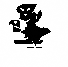

In [26]:
im = np.array(c).reshape(n1.shape)

Image.fromarray(n1-(im).astype('uint8')) 

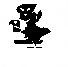

In [27]:
Image.fromarray(n2-(im).astype('uint8')) 

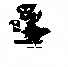

In [28]:
Image.fromarray(n3-(im).astype('uint8')) 

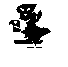

In [29]:
Image.fromarray(-im.astype('uint8')) 

<b>(g) (5 marks) Construct an input image such that it is more similar to image2 than
image1, but the reconstructed image obtained using the synchronous update function
is more similar to image1 than image2. Use the number of common pixels as the
similarity measure. Report the similarity numbers, and display image1, image2,
the input image, and the reconstructed image. Explain the reasoning behind your
construction.</b>

**Answer**. [Write your solution here. Add cells as needed.]

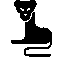

In [30]:
Image.fromarray(x1) # image1

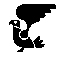

In [31]:
Image.fromarray(x2) # image2

In [55]:
sim_x = (x1 == x2).astype('int')

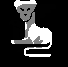

In [56]:
y1 = ((x1_binary - sim_x)**7).astype('uint8')
Image.fromarray(y1)

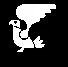

In [57]:
y2 = (x2_binary - sim_x).astype('uint8')
Image.fromarray(y2)

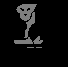

In [58]:
x_input = y1 + y2
Image.fromarray(x_input)

In [59]:
x_input_binary = binary_image(x_input).reshape(-1, 1)

W3 = w(x_input_binary)

In [60]:
c = np.ones((len(W3), 1))
for k in range(100):
    change_c = c
    print(k, c.flatten())
    c = update(W3, c) - y2.reshape(-1, 1) 
    if sum(change_c != c) == 0:
        break

0 [1. 1. 1. ... 1. 1. 1.]
1 [1 1 1 ... 1 1 1]
2 [-1 -1 -1 ... -1 -1 -1]


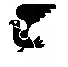

In [61]:
im = np.array(c).reshape(x2.shape)
out_x = im.astype('uint8')
Image.fromarray(out_x) 

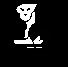

In [62]:
Image.fromarray(x2 - out_x)

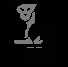

In [63]:
Image.fromarray(x_input - out_x)

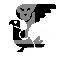

In [64]:
Image.fromarray(out_x-x_input)

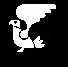

In [65]:
Image.fromarray(x1 - out_x)